In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Загрузка данных

In [2]:
data = pd.read_csv('D://Downloads//glass.csv')  # Укажите путь к вашему файлу

# 2. Первичный анализ данных

In [3]:
print(data.head())


        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [4]:
class_counts = data['Type'].value_counts()
print(class_counts)


Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


В фрейме отсутствует 4 класс

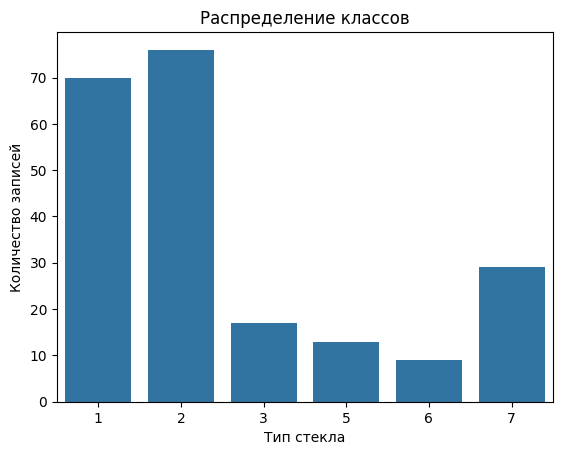

In [5]:
# Визуализация распределения классов
sns.countplot(x='Type', data=data)
plt.title('Распределение классов')
plt.xlabel('Тип стекла')
plt.ylabel('Количество записей')
plt.show()

# 3. Разделение выборки

In [6]:
X = data.drop('Type', axis=1)
y = data['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Обучение модели

In [7]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

# 5. Сравнения предсказания с истинным

In [8]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy:.2f}')

Model accuracy: 0.84


# 6. Обработка выбросов

<Figure size 300x300 with 0 Axes>

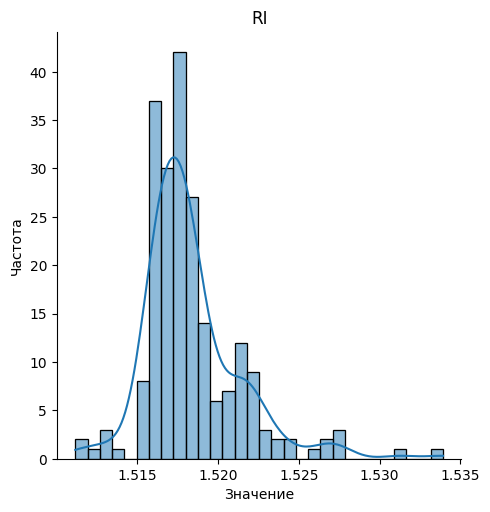

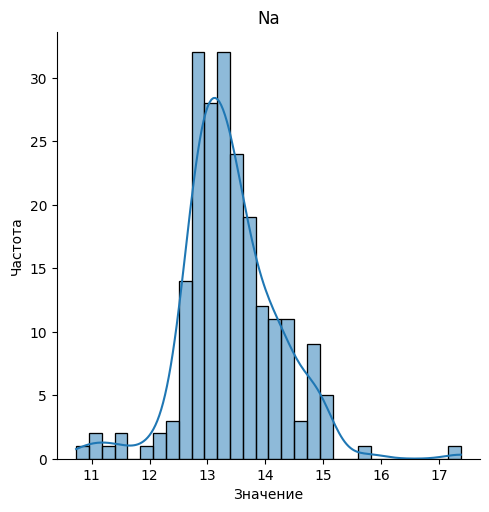

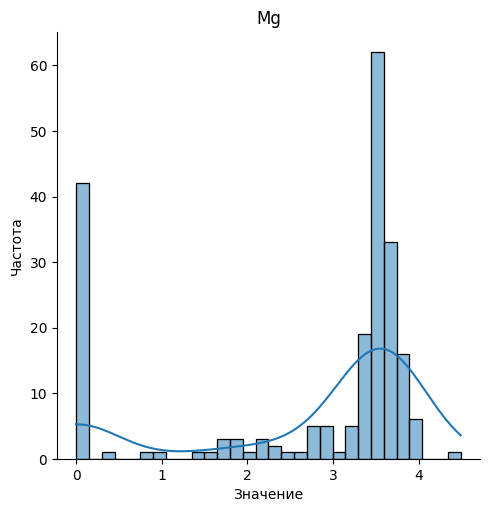

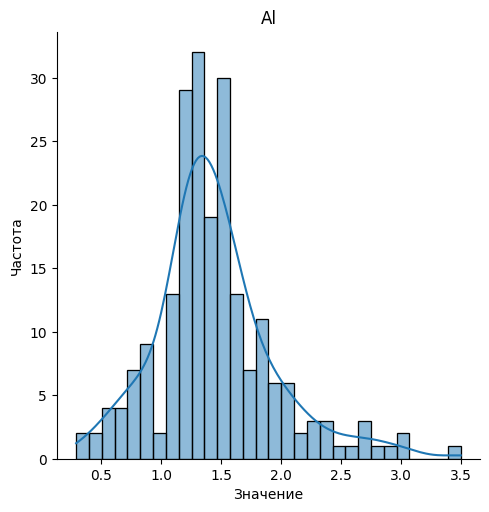

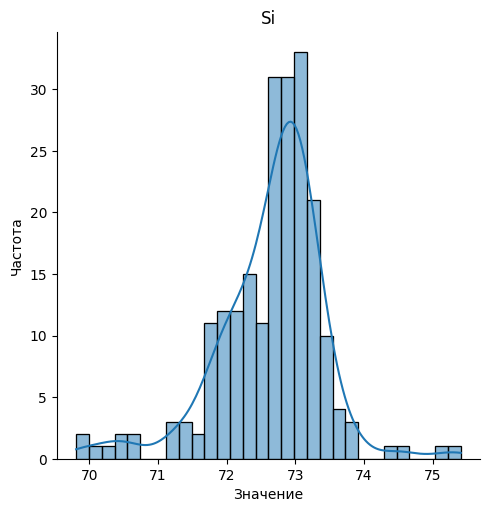

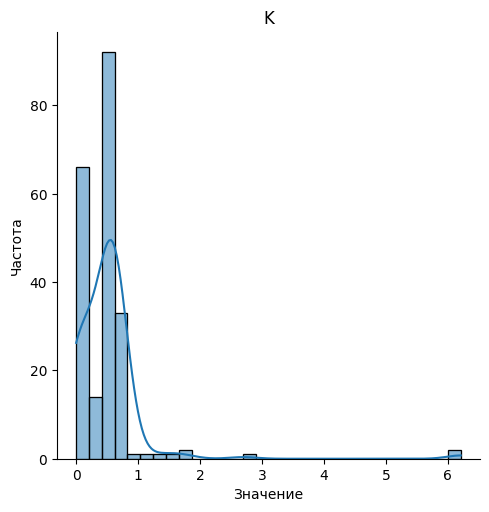

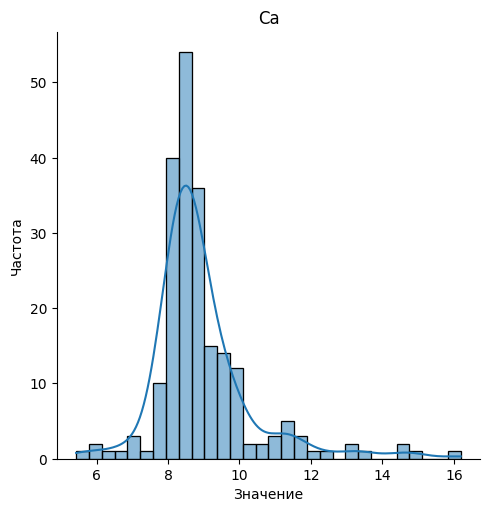

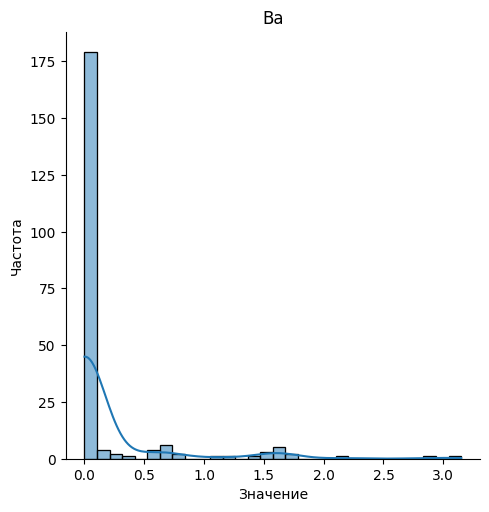

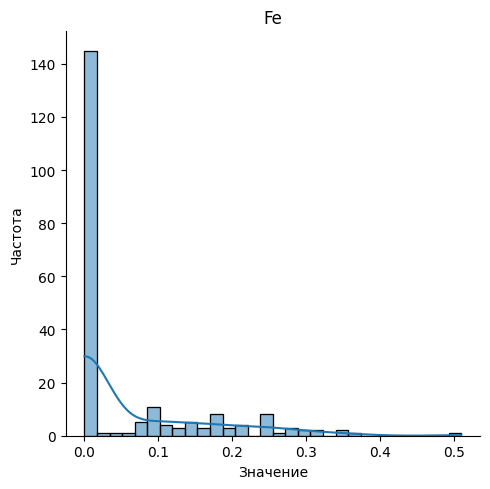

In [9]:
  plt.figure(figsize=(3, 3))
  for i, column in enumerate(X.columns):
      sns.displot(X[column], bins=30, kde=True) 
      plt.title(column)
      plt.xlabel('Значение')
      plt.ylabel('Частота')
  plt.tight_layout()
  plt.show()

In [10]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1



In [11]:
X_no_outliers = X[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]
y_no_outliers = y[X_no_outliers.index]

removed_percentage = (len(X) - len(X_no_outliers)) / len(X) * 100
print(f'Removed rows percentage: {removed_percentage:.2f}%')

Removed rows percentage: 36.45%


# 7. Повторите обучение модели после обработки выбросов.

In [12]:
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)
model_no_outliers = RandomForestClassifier(random_state=42)
model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)
y_pred_no_outliers = model_no_outliers.predict(X_test_no_outliers)
accuracy_no_outliers = accuracy_score(y_test_no_outliers, y_pred_no_outliers)
print(f'Filtered data accuracy: {accuracy_no_outliers:.2f}')

Filtered data accuracy: 0.75


# 8. Выводы

In [13]:
print(f'Model accuracy: {accuracy:.2f}')
print(f'Removed rows percentage: {removed_percentage:.2f}%')
print(f'Filtered data accuracy: {accuracy_no_outliers:.2f}')

Model accuracy: 0.84
Removed rows percentage: 36.45%
Filtered data accuracy: 0.75


Таким образом, точность модели до обработки выбросов составила 0.84, что является достаточно высоким показателем.

После удаления выбросов точность модели снизилась до 0.75. Это может указывать на то, что выбросы, возможно, 
содержали полезную информацию для классификации, и их удаление негативно сказалось на качестве модели.
Плюсы подхода к удалению выбросов включают улучшение стабильности модели и уменьшение влияния аномальных значений. 
Однако, минусы могут заключаться в потере информации, которая может быть полезной для предсказания.